## 第十一章：支持向量机和神经网络
daitu

In [2]:
## 加载包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
## 图像在jupyter notebook中显示
%matplotlib inline
## 显示的图片格式（mac中的高清格式），还可以设置为"bmp"等格式
%config InlineBackend.figure_format = "retina"
## 输出图显示中文
from matplotlib.font_manager import FontProperties
fonts = FontProperties(fname = "/Library/Fonts/华文细黑.ttf",size=14)

from sklearn import metrics
from sklearn.model_selection import train_test_split,GridSearchCV
## 忽略提醒
import warnings
warnings.filterwarnings("ignore")

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer,load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
## 读取数据
bcaner = load_breast_cancer()
## 查看数据的特征,一共有569个样本，30个特征
bcanerX = bcaner.data
bcanerX.shape

(569, 30)

In [3]:
## 查看数据的类别标签，一共有两类数据
bcanerY = bcaner.target
np.unique(bcanerY)

array([0, 1])

In [4]:
## 数据每个特征的名字
print(bcaner.feature_names.shape)
bcaner.feature_names

(30,)


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

#### 数据描述

In [5]:
## 查看数据的均值最大值、最小值等情况
bcanerdf = pd.DataFrame(data=bcanerX,columns=bcaner.feature_names)
bcanerdf.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


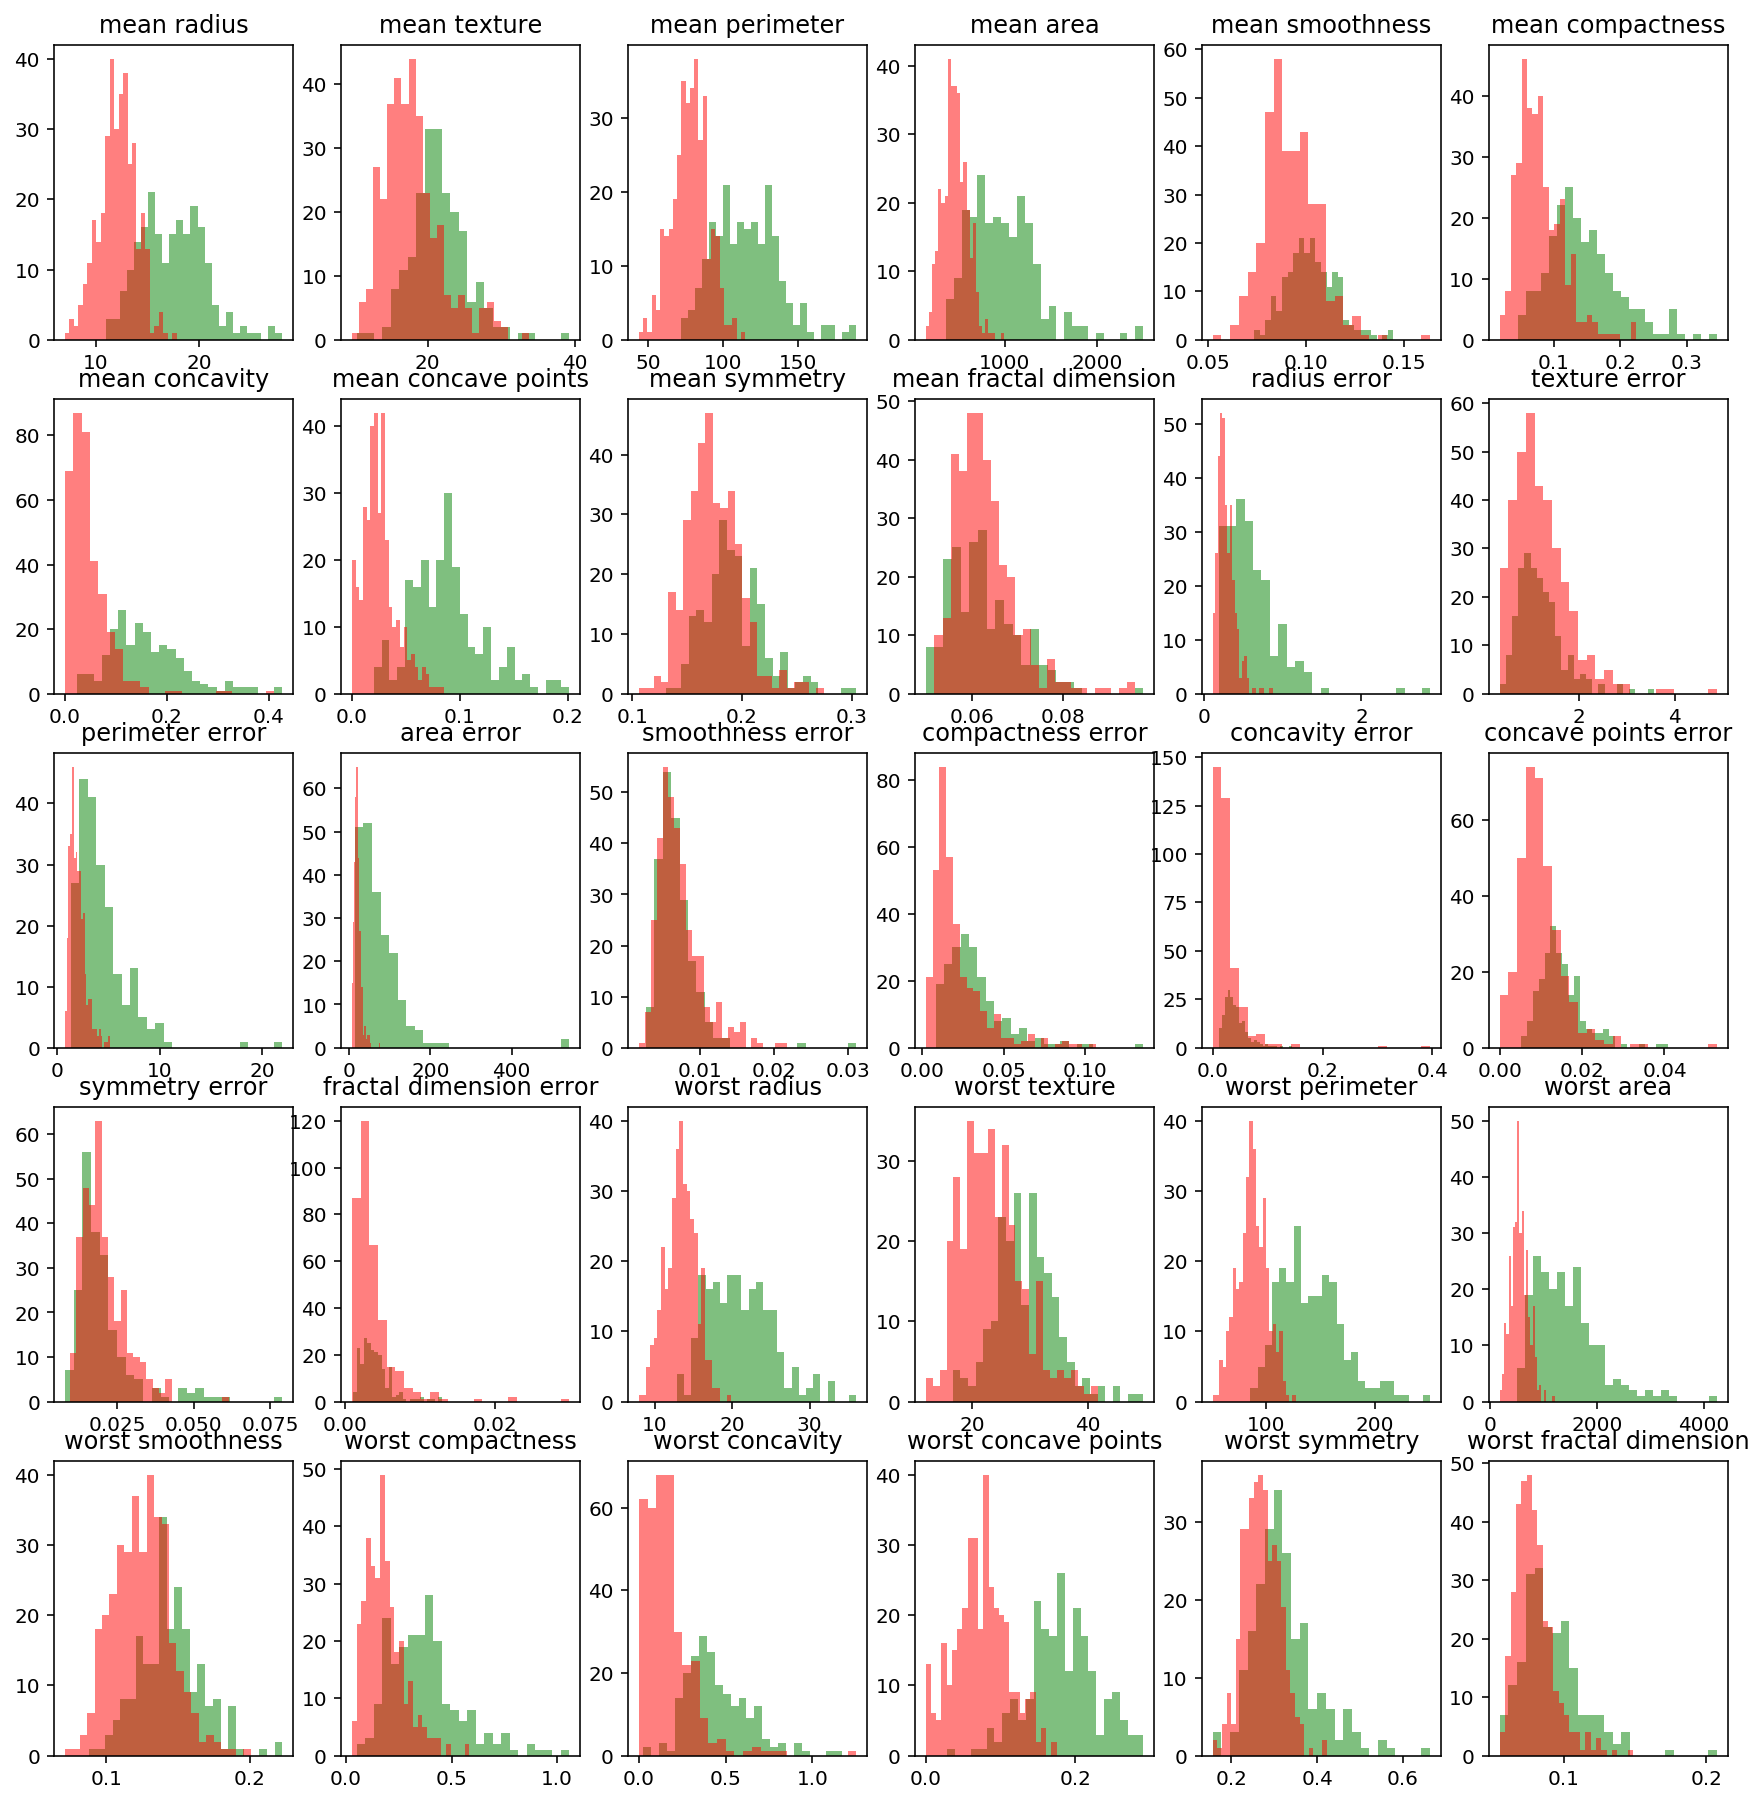

In [6]:
## 得到每个特征的直方图
plt.figure(figsize=(15,12))
for ii,name in zip(range(len(bcaner.feature_names)),bcaner.feature_names):
    plt.subplot(5,6,ii+1)
    plt.hist(bcanerX[bcanerY[:] == 0,ii],25,color="green",alpha = 0.5)
    plt.hist(bcanerX[bcanerY[:] == 1,ii],25,color="red",alpha = 0.5)
    plt.title(name)

plt.subplots_adjust(bottom = 0.01,top = 1)
plt.show()

### 支持向量机

在机器学习中，支持向量机（英语：support vector machine，常简称为SVM）是在分类与回归分析中分析数据的监督式学习模型与相关的学习算法。给定一组训练实例，每个训练实例被标记为属于两个类别中的一个或另一个，SVM训练算法创建一个将新的实例分配给两个类别之一的模型，使其成为非概率二元线性分类器。SVM模型是将实例表示为空间中的点，这样映射就使得单独类别的实例被尽可能宽的明显的间隔分开。然后，将新的实例映射到同一空间，并基于它们落在间隔的哪一侧来预测所属类别。

除了进行线性分类之外，SVM还可以使用所谓的核技巧有效地进行非线性分类，将其输入隐式映射到高维特征空间中。

使用支持向量机对肺癌数据集进行分类

In [7]:
from sklearn.svm import SVC,LinearSVC
from sklearn.decomposition import PCA

In [8]:
## 数据标准化
scale = StandardScaler(with_mean=True,with_std=True)
bcanerXS = scale.fit_transform(bcanerX)
## 使用PCA将数据降维到2维空间
bcanerX_pca = PCA(n_components=2).fit_transform(bcanerXS)
train_x,test_x,train_y,test_y = train_test_split(bcanerX_pca,bcanerY,test_size = 0.25,random_state = 2)

In [174]:
## 建立线性SVM模型
Lsvm = LinearSVC(penalty = "l2",C=1.0,## 惩罚范数和参数
                random_state= 1)
## 训练模型
Lsvm.fit(train_x,train_y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
     verbose=0)

In [175]:
## 对测试集进行预测
pre_y = Lsvm.predict(test_x)
## 计算acc和混淆矩阵
metrics.accuracy_score(test_y,pre_y)

0.9300699300699301

In [176]:
metrics.confusion_matrix(test_y,pre_y)

array([[52,  4],
       [ 6, 81]])

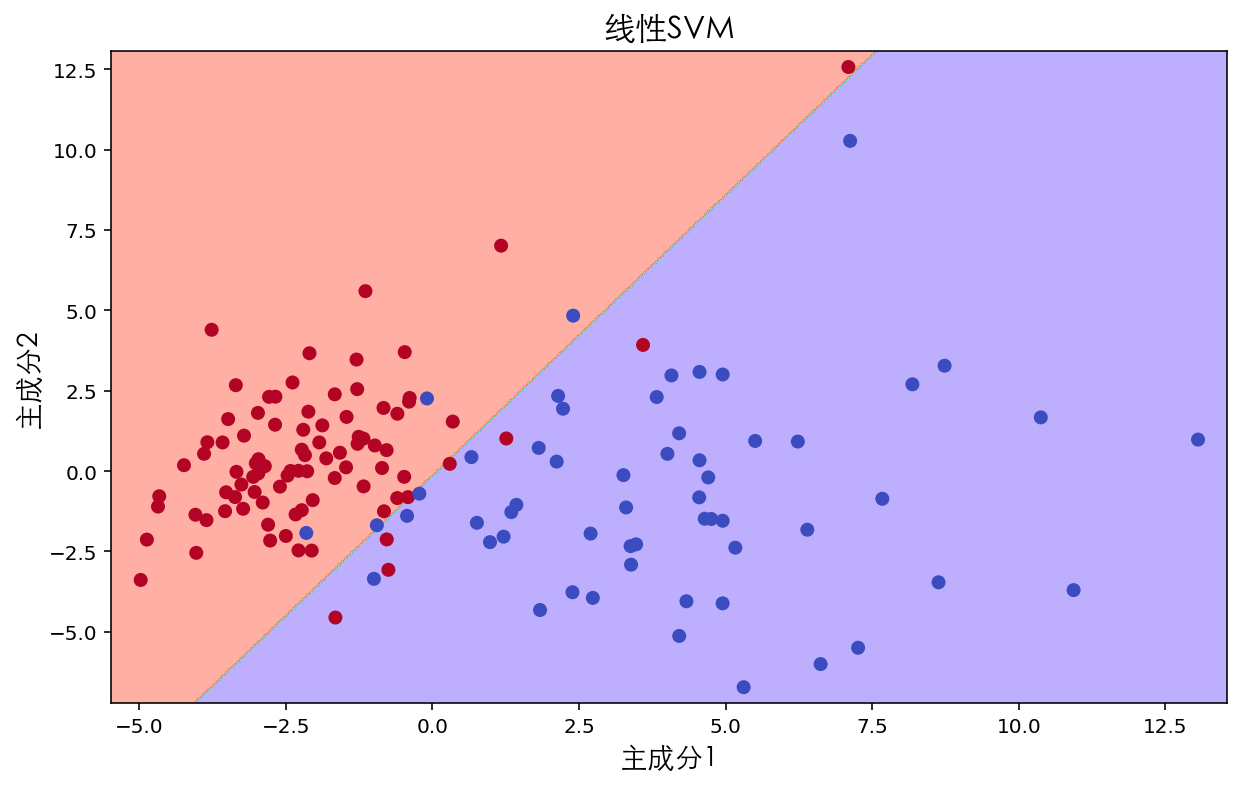

In [177]:
## 将SVM的判别图像在二维空间中绘制出来
x = np.linspace(min(test_x[:,0])-0.5,max(test_x[:,0])+0.5,500)
y = np.linspace(min(test_x[:,1])-0.5,max(test_x[:,1])+0.5,500)
xx,yy = np.meshgrid(x,y)
pre_xy = Lsvm.predict(np.c_[xx.ravel(), yy.ravel()])
pre_xy = pre_xy.reshape(xx.shape)
## 绘制图像
plt.figure(figsize=(10,6))
plt.contourf(xx,yy,pre_xy,alpha = 0.4,cmap = plt.cm.rainbow)
plt.scatter(test_x[:,0],test_x[:,1],c = test_y,cmap=plt.cm.coolwarm)
plt.xlabel("主成分1",FontProperties = fonts)
plt.ylabel("主成分2",FontProperties = fonts)
plt.title("线性SVM",FontProperties = fonts,size = 16)
plt.legend()

In [197]:
## 建立非线性SVM模型，使用rbf核
rbfsvm = SVC(kernel  = "rbf",gamma=0.05, ## RBF核和对应的参数
                random_state= 1,degree = 3)
## 训练模型
rbfsvm.fit(train_x,train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.05, kernel='sigmoid',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [198]:
## 对测试集进行预测
pre_y = rbfsvm.predict(test_x)
## 计算acc和混淆矩阵
metrics.accuracy_score(test_y,pre_y)

0.8951048951048951

In [195]:
metrics.confusion_matrix(test_y,pre_y)

array([[51,  5],
       [ 5, 82]])

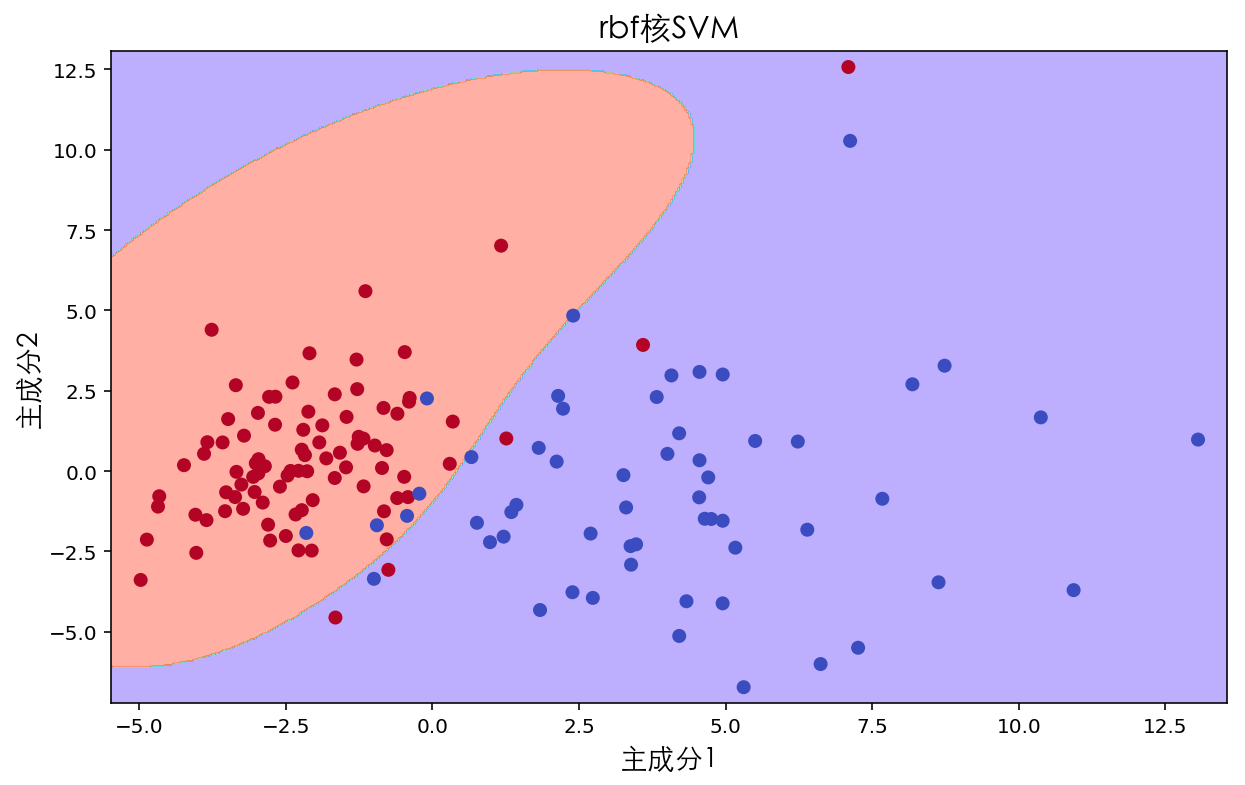

In [196]:
## 将SVM的判别图像在二维空间中绘制出来
# x = np.linspace(min(test_x[:,0])-0.5,max(test_x[:,0])+0.5,500)
# y = np.linspace(min(test_x[:,1])-0.5,max(test_x[:,1])+0.5,500)
# xx,yy = np.meshgrid(x,y)
pre_xy = rbfsvm.predict(np.c_[xx.ravel(), yy.ravel()])
pre_xy = pre_xy.reshape(xx.shape)
## 绘制图像
plt.figure(figsize=(10,6))
plt.contourf(xx,yy,pre_xy,alpha = 0.4,cmap = plt.cm.rainbow)
plt.scatter(test_x[:,0],test_x[:,1],c = test_y,cmap=plt.cm.coolwarm)
plt.xlabel("主成分1",FontProperties = fonts)
plt.ylabel("主成分2",FontProperties = fonts)
plt.title("rbf核SVM",FontProperties = fonts,size = 16)
plt.legend()

In [202]:
## 定义模型
rbfsvm2 = SVC(kernel  = "rbf", ## RBF核
                random_state= 1)

## 定义网格搜索的参数
degrees = [2,3,4,5]
gammas=[0.05,0.5,5]
para_grid = {"gamma": gammas,"degree":degrees}

## 使用3折交叉验证进行搜索
gs_rbfsvm = GridSearchCV(rbfsvm2,para_grid,n_jobs=4)
gs_rbfsvm.fit(train_x,train_y)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'gamma': [0.05, 0.5, 5], 'degree': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [203]:
gs_rbfsvm.grid_scores_

[mean: 0.94131, std: 0.01197, params: {'degree': 2, 'gamma': 0.05},
 mean: 0.95540, std: 0.01848, params: {'degree': 2, 'gamma': 0.5},
 mean: 0.92723, std: 0.02717, params: {'degree': 2, 'gamma': 5},
 mean: 0.94131, std: 0.01197, params: {'degree': 3, 'gamma': 0.05},
 mean: 0.95540, std: 0.01848, params: {'degree': 3, 'gamma': 0.5},
 mean: 0.92723, std: 0.02717, params: {'degree': 3, 'gamma': 5},
 mean: 0.94131, std: 0.01197, params: {'degree': 4, 'gamma': 0.05},
 mean: 0.95540, std: 0.01848, params: {'degree': 4, 'gamma': 0.5},
 mean: 0.92723, std: 0.02717, params: {'degree': 4, 'gamma': 5},
 mean: 0.94131, std: 0.01197, params: {'degree': 5, 'gamma': 0.05},
 mean: 0.95540, std: 0.01848, params: {'degree': 5, 'gamma': 0.5},
 mean: 0.92723, std: 0.02717, params: {'degree': 5, 'gamma': 5}]

### 神将网络

使用神经网络对肺癌数据集进行分类

### 激活函数

$$Relu:  f(x) = max(0,x)$$

$$sigmoid:f(x) = \frac{1}{1 + e^{-x}}$$

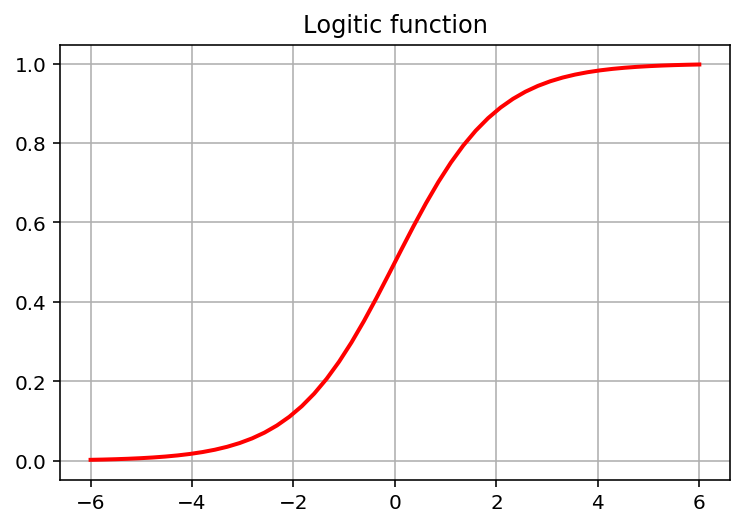

In [7]:
plt.subplot(1,1,1)
plt.plot(x,sigy,"r-",lw = 2)
plt.grid()
plt.title("Logitic function")

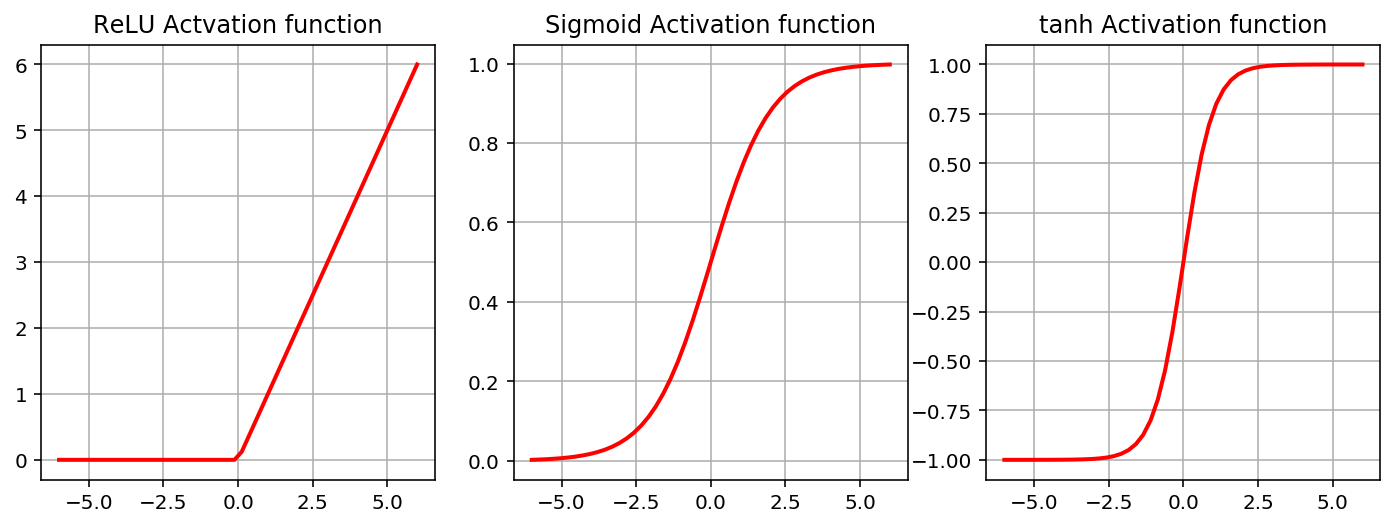

In [3]:
## 激活函数图示
x  = np.linspace(-6,6,50)
ruley = [max(0,i) for i in x]
sigy = 1 / (1 + np.exp(-x))
tanh = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

## 绘制图像
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.plot(x,ruley,"r-",lw = 2)
plt.grid()
plt.title("ReLU Actvation function")

plt.subplot(1,3,2)
plt.plot(x,sigy,"r-",lw = 2)
plt.grid()
plt.title("Sigmoid Activation function")

plt.subplot(1,3,3)
plt.plot(x,tanh,"r-",lw = 2)
plt.grid()
plt.title("tanh Activation function")

plt.show()


In [7]:
## 数据标准化
scale = StandardScaler(with_mean=True,with_std=True)
bcanerXS = scale.fit_transform(bcanerX)
train_x,test_x,train_y,test_y = train_test_split(bcanerXS,bcanerY,test_size = 0.25,random_state = 2)

#### 训练只有一个隐藏层的全连接神经网络

In [9]:
## 定义模型参数
MLP1 = MLPClassifier(hidden_layer_sizes=(10,), #第i个元素表示第i个隐藏层中神经元的数量。
                    activation = "relu", ## 隐藏层激活函数
                    alpha = 0.0001,  ## 正则化L2惩罚的参数
                    solver = "adam",  ## 求解方法
                    learning_rate = "adaptive",## 学习权重更新的速率
                    max_iter = 20,  ## 最大迭代次数
                    random_state = 40,verbose = True)

## 训练模型
MLP1.fit(train_x,train_y)

## 输出预测结果的 mean accuracy  准确率达到0.86,迭代结果为20次
MLP1.score(test_x,test_y)

Iteration 1, loss = 1.01919803
Iteration 2, loss = 0.96378115
Iteration 3, loss = 0.91202536
Iteration 4, loss = 0.86267977
Iteration 5, loss = 0.81760528
Iteration 6, loss = 0.77490618
Iteration 7, loss = 0.73563710
Iteration 8, loss = 0.69769622
Iteration 9, loss = 0.66357425
Iteration 10, loss = 0.63180413
Iteration 11, loss = 0.60210256
Iteration 12, loss = 0.57560819
Iteration 13, loss = 0.55052533
Iteration 14, loss = 0.52767705
Iteration 15, loss = 0.50619164
Iteration 16, loss = 0.48648117
Iteration 17, loss = 0.46880562
Iteration 18, loss = 0.45216917
Iteration 19, loss = 0.43704713
Iteration 20, loss = 0.42306263


0.8671328671328671

#### 分析激活函数为Rule和logisic情况下不同迭代次数对模型精度的影响

When activation is reluthe max acc: 0.965034965034965
When activation is logisticthe max acc: 0.986013986013986


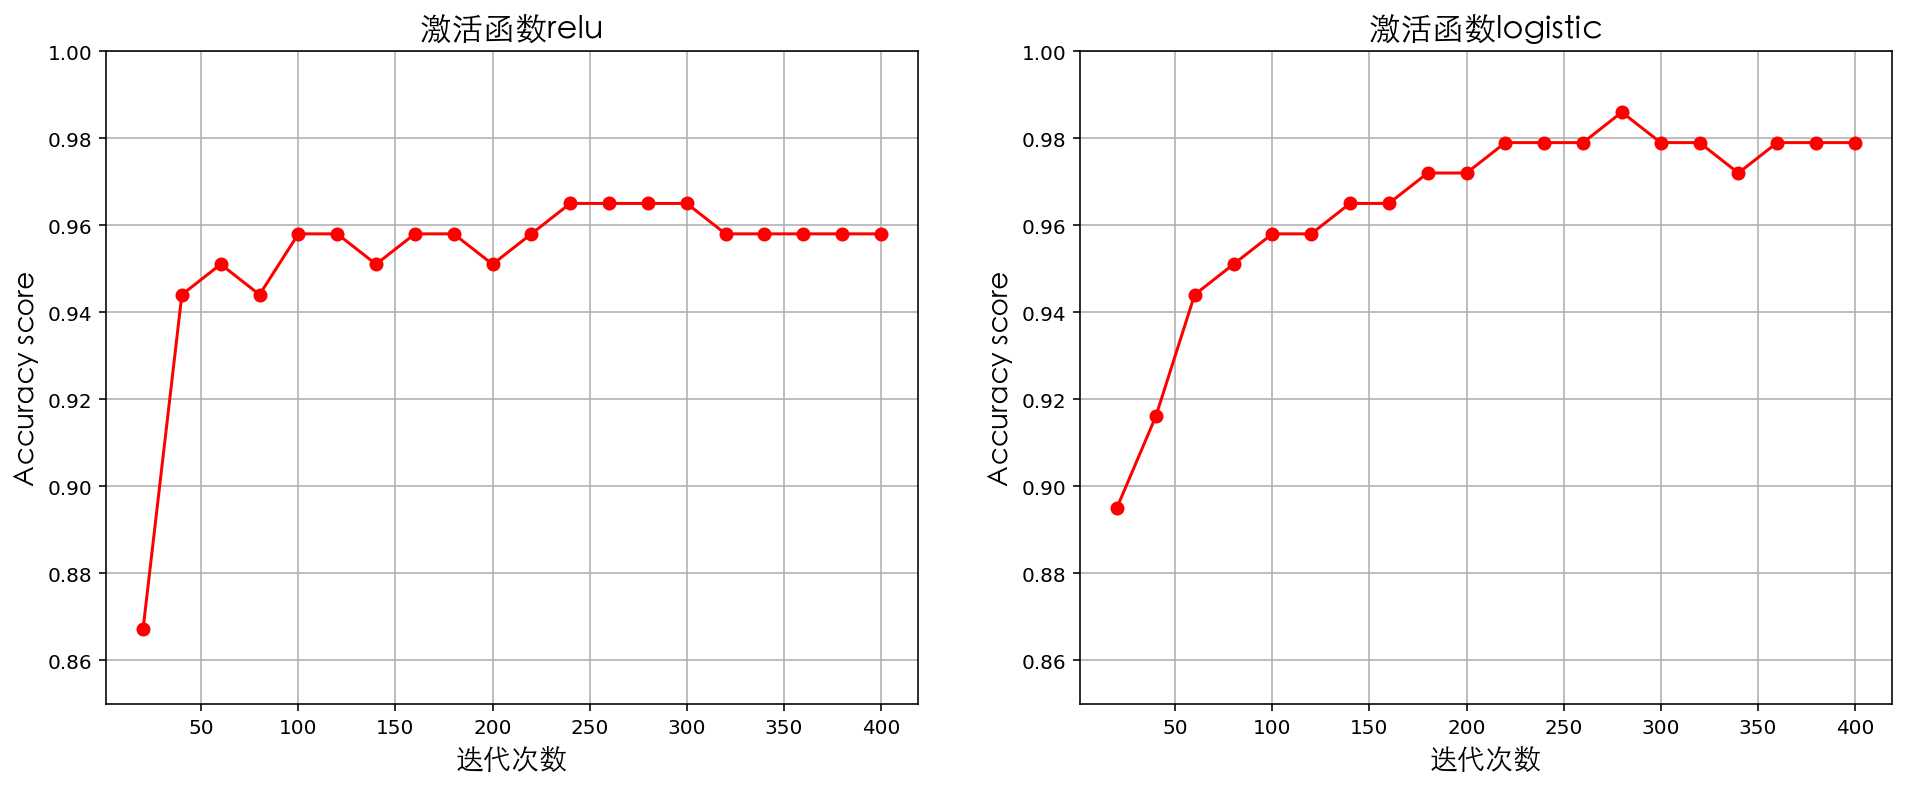

In [10]:
## 分析迭代次数对模型预测精度的影响
iters = np.arange(20,410,20)
activations = ["relu","logistic"]
plt.figure(figsize=(16,6))
for k,activation in enumerate(activations):
    acc = []
    plt.subplot(1,2,k+1)
    ## 定义模型参数
    for ii in iters:
        MLPi = MLPClassifier(hidden_layer_sizes=(10,),##第i个元素表示第i个隐藏层中神经元的数量。
                        activation = activation, ## 隐藏层激活函数
                        alpha = 0.0001,  ## 正则化L2惩罚的参数
                        solver = "adam",  ## 求解方法
                        learning_rate = "adaptive",## 学习权重更新的速率
                        max_iter = ii,  ## 最大迭代次数
                        random_state = 40,verbose = False)
        ## 计算acc
        acc.append(MLPi.fit(train_x,train_y).score(test_x,test_y))
    ## 输出最大acc
    print("When activation is "+activation+"the max acc:",np.max(acc))

    ## 绘制图像
    plt.plot(iters,acc,"r-o")
    plt.grid()
    plt.xlabel("迭代次数",FontProperties = fonts)
    plt.ylabel("Accuracy score",FontProperties = fonts)
#     plt.xticks(iters,iters)
    plt.title("激活函数"+activation,FontProperties = fonts,size = 16)
    plt.ylim(0.85,1)
plt.show()

**可以看出精度最高的迭代次数在280次左右。,精度在250次之后结果趋于稳定**

**ReLU激活（函数修正线性单元）收敛的较快，但是精度只有0.965**

**logistic（sigmoid）激活函数收敛的较慢，但是精度高，最大值为只有0.986**

另一种观察模型收敛效果的方法是绘制损失函数的曲线，下面绘制logistic激活函数的顺势曲线

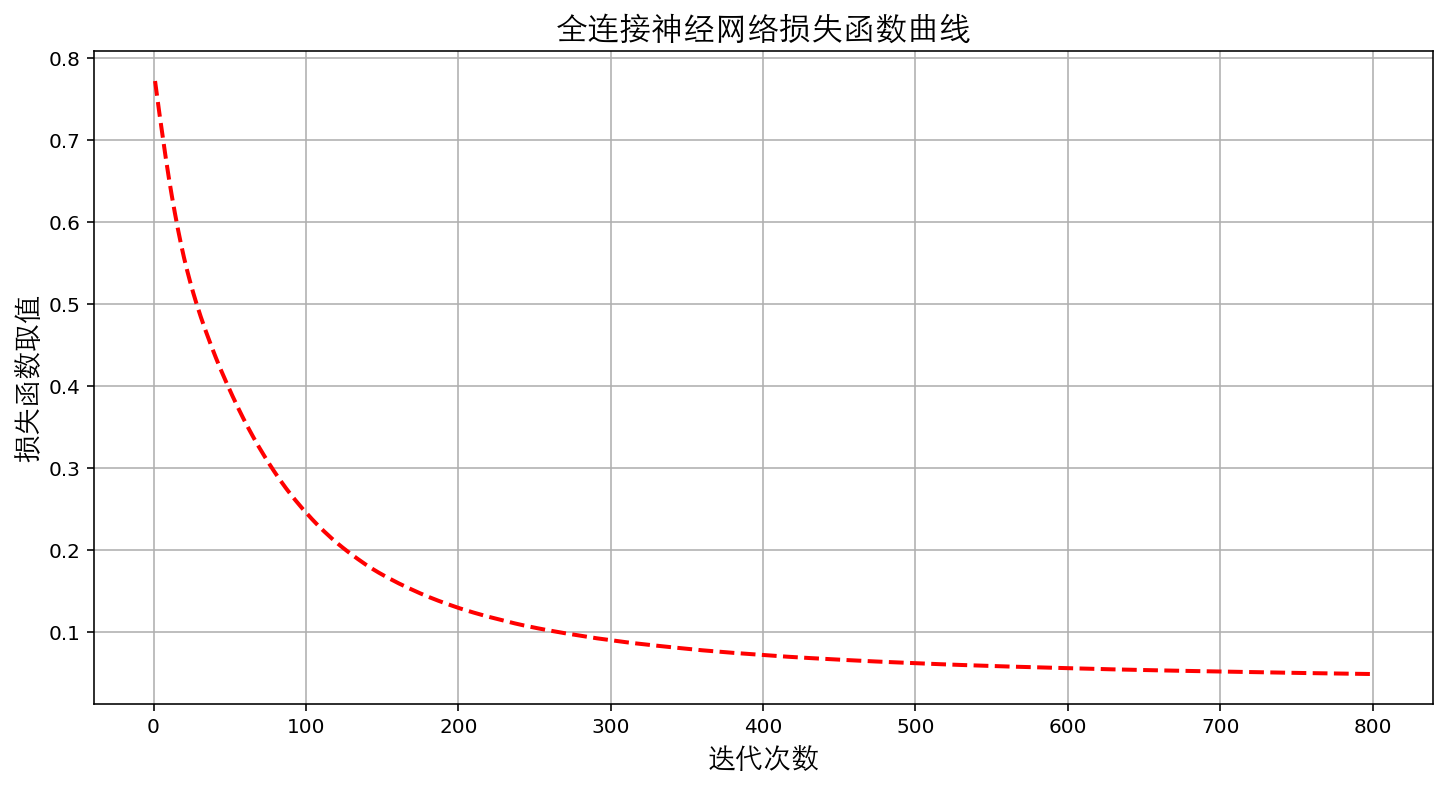

In [11]:
## 定义模型参数
MLP1 = MLPClassifier(hidden_layer_sizes=(10,), #第i个元素表示第i个隐藏层中神经元的数量。
                    activation = "logistic", ## 隐藏层激活函数
                    alpha = 0.0001,  ## 正则化L2惩罚的参数
                    solver = "adam",  ## 求解方法
                    learning_rate = "adaptive",## 学习权重更新的速率
                    max_iter = 800,  ## 最大迭代次数
                    tol = 1e-8, ## 当两次loss<tol时，模型终止
                    random_state = 40,verbose = False)
## 训练模型
MLP1.fit(train_x,train_y)
## 绘制迭代次数和loss之间的关系
## 绘制图像
plt.figure(figsize=(12,6))
plt.plot(np.arange(1,MLP1.n_iter_+1),MLP1.loss_curve_,"r--",lw = 2)
plt.grid()
plt.xlabel("迭代次数",FontProperties = fonts)
plt.ylabel("损失函数取值",FontProperties = fonts)
plt.title("全连接神经网络损失函数曲线",FontProperties = fonts,size = 16)
plt.show()

**可以发现损失函数值迅速下降然后，趋于稳定。**

#### 将神经网络的权重可视化

使用热力图

In [12]:
## 神经元的系数,输入层到第一隐藏层weight为30*10的矩阵，
## 30代表输入特征数量，即有30个输入神经元，10代表第一个隐藏层的神经元数量
## 列表中的第i个元素表示对应于第i层的权重矩阵。
len(MLP1.coefs_)
print("输入层到第一隐藏层的 weight shape:", MLP1.coefs_[0].shape)
## 10代表隐藏神经元数量，1代表1个输出的神经元数量
print("第一隐藏层到输出层的 weight shape:", MLP1.coefs_[1].shape)

输入层到第一隐藏层的 weight shape: (30, 10)
第一隐藏层到输出层的 weight shape: (10, 1)


In [13]:
## 列表中的第i个元素表示与层i + 1相对应的偏置向量。
print(MLP1.intercepts_)
## 隐藏层偏置向量，10*1；10代表每个神经元的偏置
print("第一隐藏层basic shanpe:",MLP1.intercepts_[0].shape)
## 隐藏层偏置向量，1*1；1代表1个输出神经元的偏置
print("输出层basic shanpe:",MLP1.intercepts_[1].shape)

[array([-0.19729207,  0.30674926,  0.21951736, -0.49143822, -0.31103738,
        0.35803398, -0.31592228, -0.20158182,  0.33315702,  0.21379142]), array([0.14844813])]
第一隐藏层basic shanpe: (10,)
输出层basic shanpe: (1,)


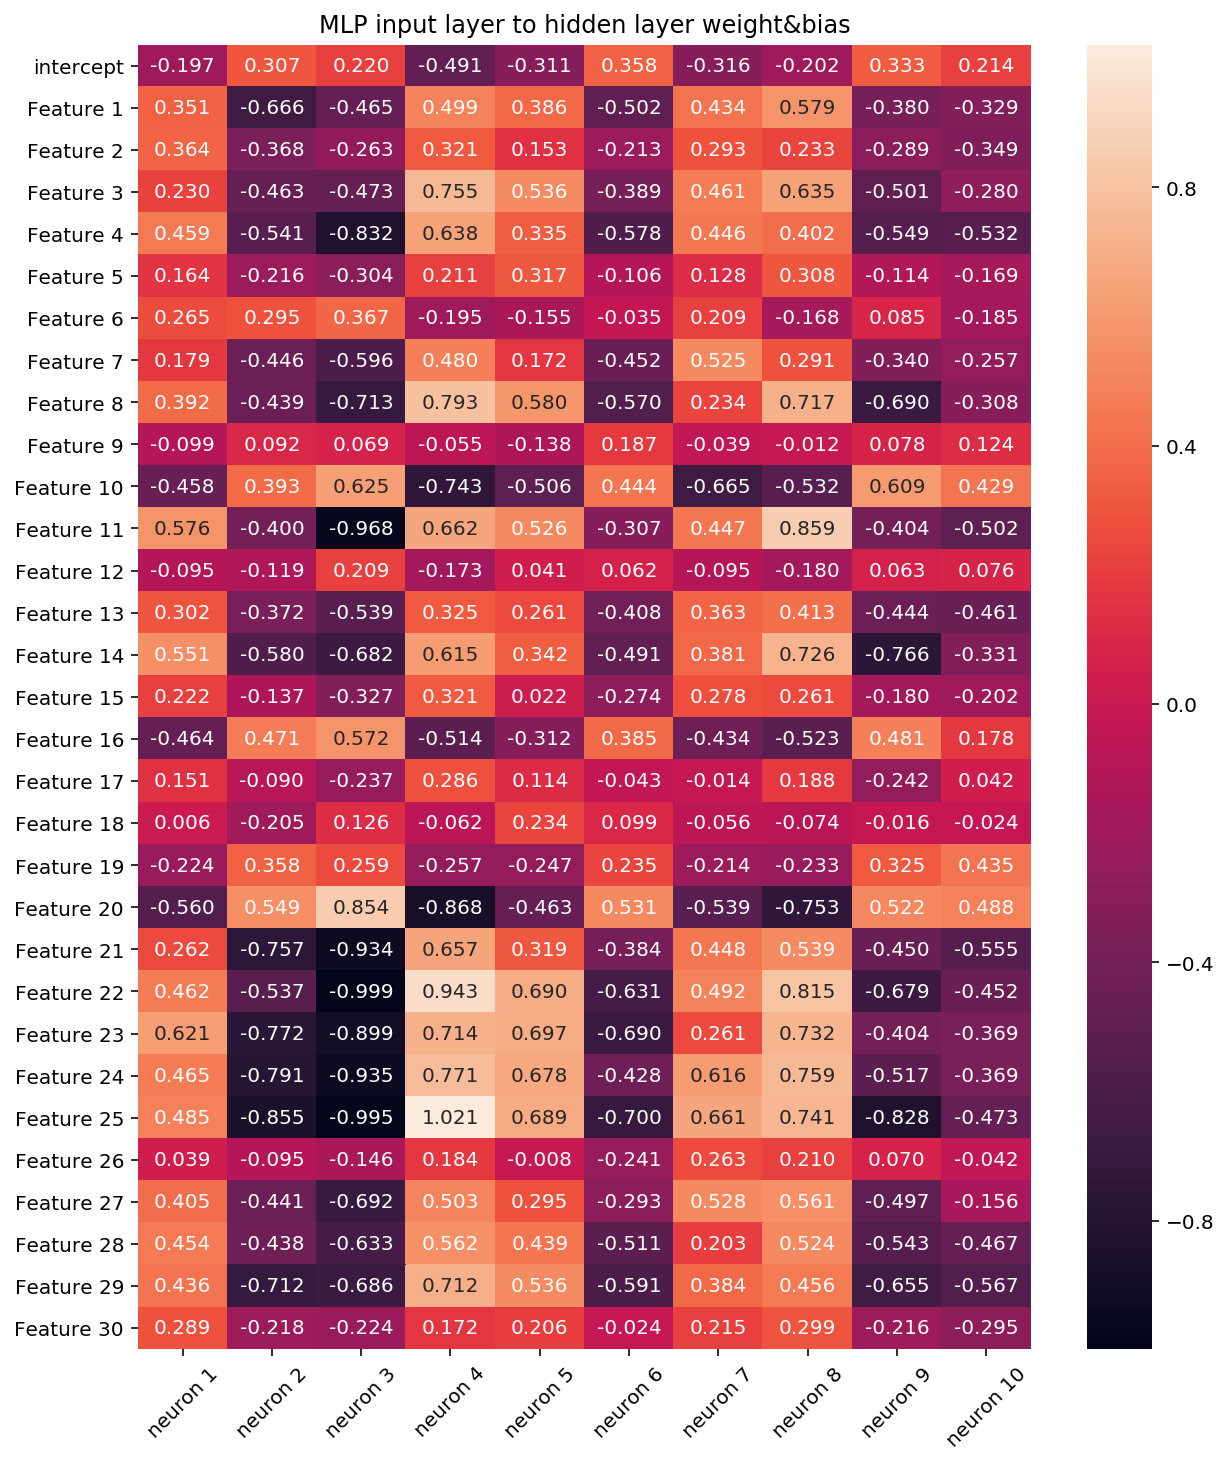

In [14]:
## 查看输入层到第一隐藏层的系数热力图（只有一个隐藏层）
## 含有intercept的热力图
mat = np.vstack((MLP1.intercepts_[0],MLP1.coefs_[0]))
## 绘制图像
plt.figure(figsize = (10,12))
sns.heatmap(mat ,annot=True,fmt = "0.3f")
xticks = ["neuron "+str(i+1) for i in range(MLP1.coefs_[0].shape[1])]
plt.xticks(np.arange(mat.shape[1])+0.5,xticks,rotation=45)
yticks = ["intercept"]+["Feature "+str(i+1) for i in range(mat.shape[0])]
plt.yticks(np.arange(mat.shape[0])+0.5,yticks,rotation=0)
plt.title("MLP input layer to hidden layer weight&bias")
plt.show()

####   训练多层全连接神经网络进行手写字体识别

使用MNIST_data数据集

In [9]:
from tensorflow.examples.tutorials.mnist import input_data

In [56]:
## 加载数据
## 下载下来的数据集被分成两部分：55000行的训练数据集（mnist.train）和10000行的测试数据集（mnist.test）
## 正如前面提到的一样，每一个MNIST数据单元有两部分组成：一张包含手写数字的图片和一个对应的标签。
## 我们把这些图片设为“xs”，把这些标签设为“ys”。训练数据集和测试数据集都包含xs和ys，
## 比如训练数据集的图片是 mnist.train.images ，训练数据集的标签是 mnist.train.labels
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [57]:
## 该数据图像大小为28*28
print("训练集数据尺寸：",mnist.train.images.shape)
print("测试集数据尺寸：",mnist.test.images.shape)
print("训练集标签尺寸：",mnist.train.labels.shape)
print("测试集标签尺寸：",mnist.test.labels.shape)

训练集数据尺寸： (55000, 784)
测试集数据尺寸： (10000, 784)
训练集标签尺寸： (55000,)
测试集标签尺寸： (10000,)


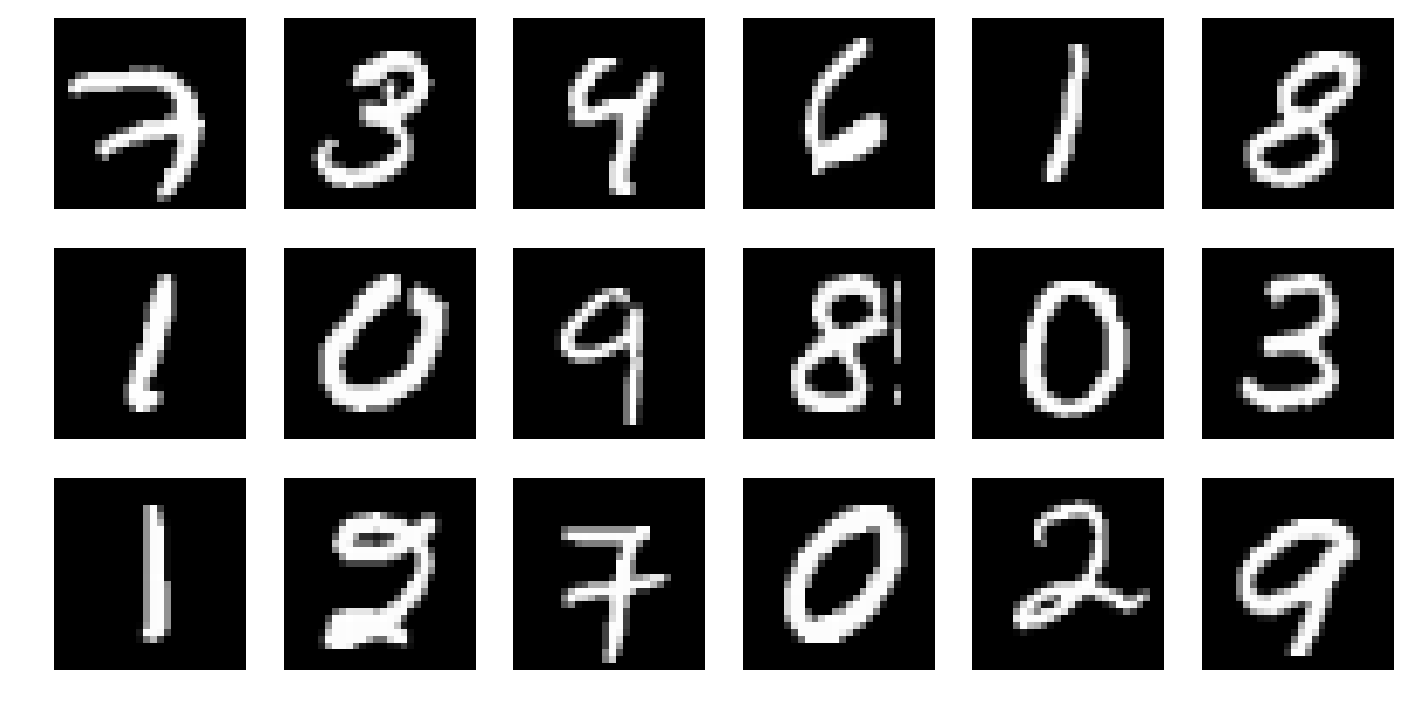

In [58]:
## 查看其中的一些图像数据
imsize = np.int0(np.sqrt(mnist.train.images.shape[1]))
plt.figure(figsize=(12,6))
for ii in range(18):
    imi = mnist.train.images[ii,:].reshape((-1,imsize))
    plt.subplot(3,6,ii+1)
    plt.imshow(imi,cmap = plt.cm.gray)
    plt.axis("off")    
plt.show()

In [59]:
## 训练全连接神经网络
## 定义模型参数
MLP_Mn = MLPClassifier(hidden_layer_sizes=(30,30,30), #第i个元素表示第i个隐藏层中神经元的数量。
                      activation = "relu", ## 隐藏层激活函数
                      alpha = 0.0001,  ## 正则化L2惩罚的参数
                      solver = "adam",  ## 求解方法
                      learning_rate = "adaptive",## 学习权重更新的速率
                      random_state = 4,verbose = False)
## 训练模型
MLP_Mn.fit(mnist.train.images,mnist.train.labels)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=4, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [60]:
## 对测试集进行预测
MLP_pre = MLP_Mn.predict(mnist.test.images)

In [63]:
MLP_pre.shape

(10000,)

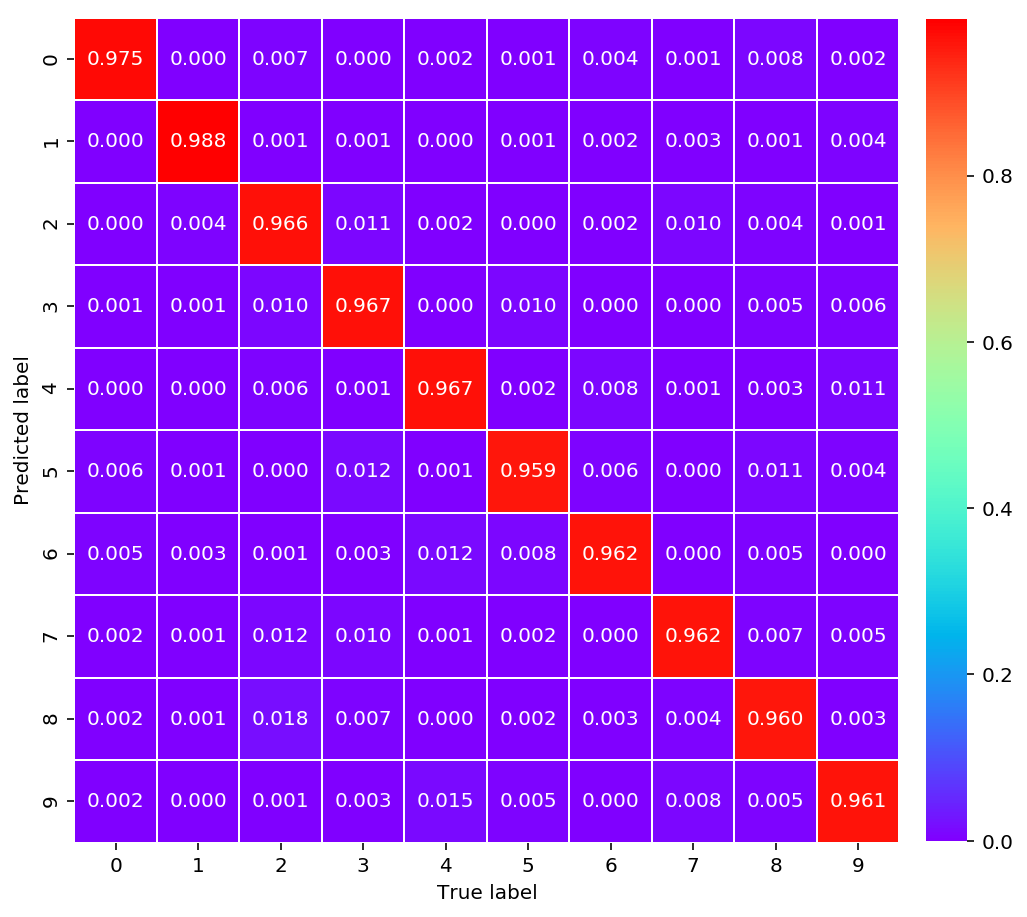

In [69]:
## 混淆矩阵可视化
plt.figure(figsize=(8,8))
confm = metrics.confusion_matrix(mnist.test.labels,MLP_pre)
confm = confm / np.sum(confm,axis=0)
sns.heatmap(confm.T, square=True,annot=True,fmt = ".3f",
                 linewidths=.5,cmap=plt.cm.rainbow,
                 cbar_kws={"fraction":0.046, "pad":0.03})
plt.xlabel('True label')
plt.ylabel('Predicted label');

In [70]:
## 
print(metrics.classification_report(mnist.test.labels,MLP_pre))
print(metrics.accuracy_score(mnist.test.labels,MLP_pre))

             precision    recall  f1-score   support

          0       0.97      0.98      0.98       980
          1       0.99      0.99      0.99      1135
          2       0.97      0.95      0.96      1032
          3       0.97      0.95      0.96      1010
          4       0.97      0.97      0.97       982
          5       0.96      0.97      0.96       892
          6       0.96      0.97      0.97       958
          7       0.96      0.97      0.97      1028
          8       0.96      0.95      0.96       974
          9       0.96      0.96      0.96      1009

avg / total       0.97      0.97      0.97     10000

0.967


In [204]:
# ## 尝试其他参数看是否能够提高准确率
# ## 对建模过程进行封装
# MLP_Mn = MLPClassifier(activation = "relu", ## 隐藏层激活函数
#                       solver = "adam",  ## 求解方法
#                       learning_rate = "adaptive",## 学习权重更新的速率
#                       random_state = 4,verbose = True)

# ## 定义网格搜索的参数
# alpha = [0.0001,0.001,0.01]
# hidden_layer_sizes = [(30,30),(100,100),(30,30,30),(100,100,100)]
# para_grid = [{"alpha": alpha,"hidden_layer_sizes":hidden_layer_sizes}]

# ## 使用3折交叉验证进行搜索
# gs_MLP_clf = GridSearchCV(MLP_Mn,para_grid,cv = 3,n_jobs=2)
# gs_MLP_clf.fit(mnist.train.images,mnist.train.labels)